In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Boston = pd.read_csv('boston.csv')
Boston.info()
Boston

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   NDUS     506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


,CRIM,ZN,NDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [4]:
summary = Boston.describe()
summary

,CRIM,ZN,NDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [7]:
q1 = Boston['CRIM'].quantile(.25)
q3 = Boston['CRIM'].quantile(.75)
iqr = q3-q1

l = q1-(1.5*iqr)
h = q3+(1.5*iqr)


9.06963875

In [8]:
q1 = Boston['CRIM'].quantile(.25)
q3 = Boston['CRIM'].quantile(.75)
iqr = q3-q1

mn = q1-(1.5*iqr)
mx = q3+(1.5*iqr)

h = Boston.loc[Boston['CRIM'] >= mx]
l = Boston.loc[Boston['CRIM'] <= mn]

comb = [h,l]
otl = pd.concat(comb)
display(otl)

,CRIM,ZN,NDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
367,13.5222,0.0,18.1,0,0.631,3.863,100.0,1.5106,24,666,20.2,13.33,23.1
371,9.2323,0.0,18.1,0,0.631,6.216,100.0,1.1691,24,666,20.2,9.53,50.0
373,11.1081,0.0,18.1,0,0.668,4.906,100.0,1.1742,24,666,20.2,34.77,13.8
374,18.4982,0.0,18.1,0,0.668,4.138,100.0,1.1370,24,666,20.2,37.97,13.8
375,19.6091,0.0,18.1,0,0.671,7.313,97.9,1.3163,24,666,20.2,13.44,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,15.5757,0.0,18.1,0,0.580,5.926,71.0,2.9084,24,666,20.2,18.13,19.1
469,13.0751,0.0,18.1,0,0.580,5.713,56.7,2.8237,24,666,20.2,14.76,20.1
477,15.0234,0.0,18.1,0,0.614,5.304,97.3,2.1007,24,666,20.2,24.91,12.0
478,10.2330,0.0,18.1,0,0.614,6.185,96.7,2.1705,24,666,20.2,18.03,14.6


In [16]:
age1 = Boston['AGE'].mean()
age2 = otl['AGE'].mean()
print('mean AGE from boston','\t', age1)
print('mean AGE from otl', '\t', age2)

mean AGE from boston 	 68.57490118577078
mean AGE from otl 	 94.23333333333335


Text(0, 0.5, 'Nitric oxides concentration, parts per 10M')

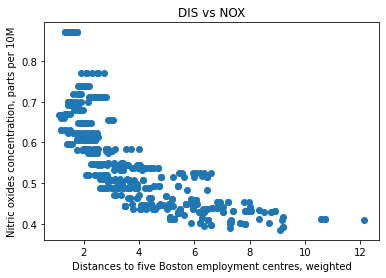

In [19]:
x = Boston['DIS']
y = Boston['NOX']

plt.scatter(x,y)
plt.title('DIS vs NOX')
plt.xlabel('Distances to five Boston employment centres, weighted')
plt.ylabel('Nitric oxides concentration, parts per 10M')

In [20]:
Boston.loc[:,['DIS','NOX']].corr()

,DIS,NOX
DIS,1.00000,-0.76923
NOX,-0.76923,1.00000


Text(0, 0.5, 'full-value property-tax rate per $10,000')

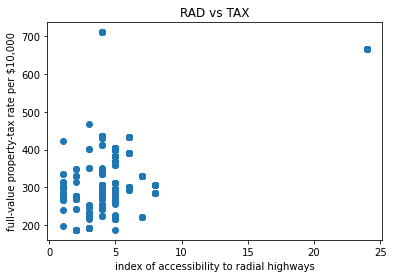

In [21]:
x = Boston['RAD']
y = Boston['TAX']

plt.scatter(x,y)
plt.title('RAD vs TAX')
plt.xlabel('index of accessibility to radial highways')
plt.ylabel('full-value property-tax rate per $10,000')

In [22]:
Boston.loc[:,['RAD','TAX']].corr()

,RAD,TAX
RAD,1.000000,0.910228
TAX,0.910228,1.000000


In [24]:
a = Boston['RAD'].quantile(.25)
c = Boston['RAD'].quantile(.75)
q = c - a

mna = a - (1.5*a)
mxb = c + (1.5*c)

hh = Boston.loc[Boston['RAD']<= mxb]
ll = Boston.loc[Boston['RAD']>= mna]

cmb = [hh,ll]
rmotl = pd.concat(cmb)
display(rmotl)

,CRIM,ZN,NDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


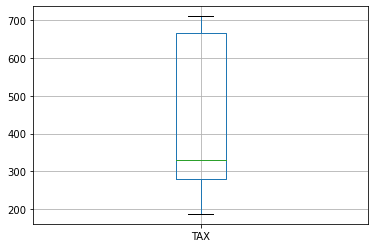

In [25]:
TAX = Boston.boxplot('TAX')

In [27]:
Boston['TAX'].dtypes

dtype('int64')

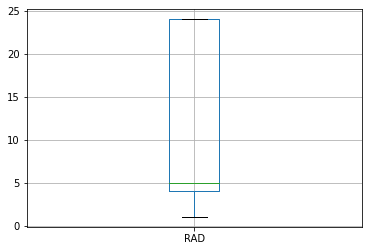

In [26]:
RAD = Boston.boxplot('RAD')

In [28]:
Boston['RAD'].dtypes

dtype('int64')

In [37]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
tips_df['tip_percent'] = ((tips_df['tip'] / tips_df['total_bill'])*100).round(decimals = 2)

print(tips_df)

     total_bill   tip     sex smoker   day    time  size  tip_percent
0         16.99  1.01  Female     No   Sun  Dinner     2         5.94
1         10.34  1.66    Male     No   Sun  Dinner     3        16.05
2         21.01  3.50    Male     No   Sun  Dinner     3        16.66
3         23.68  3.31    Male     No   Sun  Dinner     2        13.98
4         24.59  3.61  Female     No   Sun  Dinner     4        14.68
..          ...   ...     ...    ...   ...     ...   ...          ...
239       29.03  5.92    Male     No   Sat  Dinner     3        20.39
240       27.18  2.00  Female    Yes   Sat  Dinner     2         7.36
241       22.67  2.00    Male    Yes   Sat  Dinner     2         8.82
242       17.82  1.75    Male     No   Sat  Dinner     2         9.82
243       18.78  3.00  Female     No  Thur  Dinner     2        15.97

[244 rows x 8 columns]


In [39]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   total_bill   244 non-null    float64 
 1   tip          244 non-null    float64 
 2   sex          244 non-null    category
 3   smoker       244 non-null    category
 4   day          244 non-null    category
 5   time         244 non-null    category
 6   size         244 non-null    int64   
 7   tip_percent  244 non-null    float64 
dtypes: category(4), float64(3), int64(1)
memory usage: 9.3 KB


In [40]:
print(tips_df.isnull().sum())

total_bill     0
tip            0
sex            0
smoker         0
day            0
time           0
size           0
tip_percent    0
dtype: int64


In [41]:
t1 = tips_df.groupby(['time'])['size'].sum().reset_index()
t2 = tips_df.groupby(['time'])['smoker'].count().reset_index()

display(t1,t2)

time = pd.merge(t1,t2)
time

,time,size
0,Lunch,164
1,Dinner,463


,time,smoker
0,Lunch,68
1,Dinner,176


,time,size,smoker
0,Lunch,164,68
1,Dinner,463,176


In [42]:
time['smoker_percent'] = ((time['smoker'] / time['size'])*100).round(decimals = 2)

print(time)

     time  size  smoker  smoker_percent
0   Lunch   164      68           41.46
1  Dinner   463     176           38.01


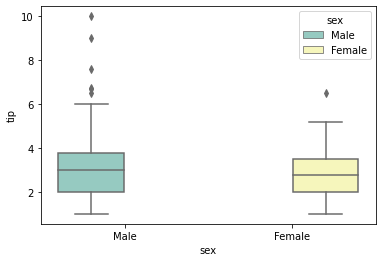

In [46]:
bp_tips = sns.boxplot(x = "sex", y= "tip", hue = "sex", data = tips_df, palette = "Set3")

(0.0, 70.0)

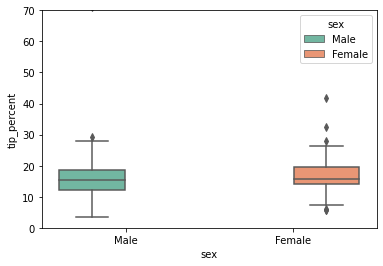

In [47]:
bp_tips2 = sns.boxplot(x = "sex", y= "tip_percent", hue ="sex", data = tips_df, palette = "Set2")
plt.ylim(0,70)

In [2]:
av = pd.read_csv('avocado.csv')
av.info()
av

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18073 non-null  object 
 1   AveragePrice  18065 non-null  float64
 2   TotalVolume   18057 non-null  float64
 3   Small         18055 non-null  float64
 4   Large         18071 non-null  float64
 5   AllSizes      18065 non-null  float64
 6   TotalBags     18065 non-null  float64
 7   Type          18045 non-null  object 
 8   Year          18053 non-null  float64
 9   Region        18080 non-null  object 
dtypes: float64(7), object(3)
memory usage: 1.4+ MB


,Date,AveragePrice,TotalVolume,Small,Large,AllSizes,TotalBags,Type,Year,Region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,conventional,2015.0,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,conventional,NaN,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,NaN,8145.35,conventional,2015.0,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,conventional,2015.0,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,organic,2018.0,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,organic,2018.0,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,organic,2018.0,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,organic,2018.0,WestTexNewMexico


In [3]:
av.isnull().sum()

Date            176
AveragePrice    184
TotalVolume     192
Small           194
Large           178
AllSizes        184
TotalBags       184
Type            204
Year            196
Region          169
dtype: int64

In [4]:
av1 = av.dropna()
av1

,Date,AveragePrice,TotalVolume,Small,Large,AllSizes,TotalBags,Type,Year,Region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,conventional,2015.0,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,conventional,2015.0,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,conventional,2015.0,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,conventional,2015.0,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,organic,2018.0,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,organic,2018.0,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,organic,2018.0,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,organic,2018.0,WestTexNewMexico


In [5]:
av1.describe()

,AveragePrice,TotalVolume,Small,Large,AllSizes,TotalBags,Year
count,16477.000000,1.647700e+04,1.647700e+04,1.647700e+04,1.647700e+04,1.647700e+04,16477.000000
mean,1.406024,8.520210e+05,2.940576e+05,2.950868e+05,2.274981e+04,2.401246e+05,2016.144808
std,0.402029,3.454432e+06,1.264981e+06,1.204101e+06,1.071024e+05,9.863102e+05,0.940268
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,1.100000,1.083858e+04,8.530300e+02,2.996950e+03,0.000000e+00,5.061120e+03,2015.000000
50%,1.370000,1.075650e+05,8.696590e+03,2.894704e+04,1.854800e+02,3.962046e+04,2016.000000
75%,1.660000,4.327701e+05,1.109547e+05,1.500448e+05,6.243420e+03,1.107179e+05,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,2018.000000


In [6]:
AP = av1['AveragePrice'].median()
TV = av1['TotalVolume'].median()
S = av1['Small'].median()
L = av1['Large'].median()
AS = av1['AllSizes'].median()
TB = av1['TotalBags'].median()
Y = av1['Year'].median()

print('Avg Price', '\t....', AP)
print('Total Volm','\t....', TV)
print('Small','\t....', S)
print('Large','\t....', L)
print('All Sizes','\t....', AS)
print('Total Bags','\t....', TB)
print('Year','\t....', Y)

Avg Price 	.... 1.37
Total Volm 	.... 107565.04
Small 	.... 8696.59
Large 	.... 28947.04
All Sizes 	.... 185.48
Total Bags 	.... 39620.46
Year 	.... 2016.0


array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'TotalVolume'}>,
        <AxesSubplot:title={'center':'Small'}>],
       [<AxesSubplot:title={'center':'Large'}>,
        <AxesSubplot:title={'center':'AllSizes'}>,
        <AxesSubplot:title={'center':'TotalBags'}>],
       [<AxesSubplot:title={'center':'Year'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

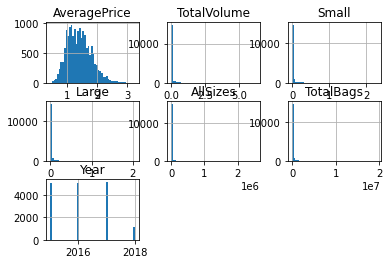

In [24]:
av1.hist(bins = 50)

<AxesSubplot:>

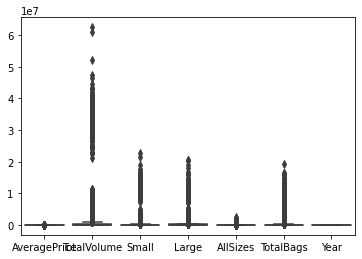

In [25]:
sns.boxplot(data = av1)

In [11]:
av2 = av1.astype({"Type":'category'})
av3 = av2.astype({"Year":'category'})
av4 = av3.astype({"Region":'category'})

av4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16477 entries, 0 to 18248
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Date          16477 non-null  object  
 1   AveragePrice  16477 non-null  float64 
 2   TotalVolume   16477 non-null  float64 
 3   Small         16477 non-null  float64 
 4   Large         16477 non-null  float64 
 5   AllSizes      16477 non-null  float64 
 6   TotalBags     16477 non-null  float64 
 7   Type          16477 non-null  category
 8   Year          16477 non-null  category
 9   Region        16477 non-null  category
dtypes: category(3), float64(6), object(1)
memory usage: 1.1+ MB


In [23]:
av5 = av4[(av4.Region != 'TotalUS') & (av4.Region != 'West')]
av5.sort_values(by = ['Date'], ascending = True)
av5.tail(50)

,Date,AveragePrice,TotalVolume,Small,Large,AllSizes,TotalBags,Type,Year,Region
18169,2018-02-25,1.64,4720.69,269.06,1496.26,0.00,2955.37,organic,2018.0,Spokane
18170,2018-02-18,1.64,4747.13,271.98,1421.43,0.00,3053.72,organic,2018.0,Spokane
18171,2018-02-11,1.66,4099.32,243.98,1330.99,0.00,2524.35,organic,2018.0,Spokane
18172,2018-02-04,1.70,4561.62,277.76,1722.99,0.00,2560.87,organic,2018.0,Spokane
18173,2018-01-28,1.70,4300.76,195.24,1169.26,0.00,2936.26,organic,2018.0,Spokane
18174,2018-01-21,1.76,4532.08,227.35,1340.50,0.00,2964.23,organic,2018.0,Spokane
18175,2018-01-14,1.85,4412.54,150.54,1948.36,0.00,2313.64,organic,2018.0,Spokane
18176,2018-01-07,1.74,3788.91,212.72,1413.85,0.00,2162.34,organic,2018.0,Spokane
18177,2018-03-25,1.82,8210.37,1426.49,2452.50,0.00,4331.38,organic,2018.0,StLouis
18178,2018-03-18,1.80,7105.79,1052.26,2821.98,7.09,3224.46,organic,2018.0,StLouis


In [26]:
av6 = av5.groupby('Region')['TotalVolume'].sum()
print(av6)

Region
Albany                 1.396769e+07
Atlanta                8.188527e+07
BaltimoreWashington    1.226530e+08
Boise                  1.368711e+07
Boston                 9.137406e+07
BuffaloRochester       2.095624e+07
California             9.569033e+08
Charlotte              3.202630e+07
Chicago                1.225148e+08
CincinnatiDayton       3.944478e+07
Columbus               2.629619e+07
DallasFtWorth          1.861892e+08
Denver                 1.203175e+08
Detroit                5.387771e+07
GrandRapids            2.730414e+07
GreatLakes             5.235924e+08
HarrisburgScranton     3.821875e+07
HartfordSpringfield    4.663877e+07
Houston                1.870290e+08
Indianapolis           2.753484e+07
Jacksonville           2.565901e+07
LasVegas               4.862492e+07
LosAngeles             4.594862e+08
Louisville             1.440995e+07
MiamiFtLauderdale      8.726690e+07
Midsouth               4.602885e+08
Nashville              3.201244e+07
NewOrleansMobile     

<AxesSubplot:ylabel='Region'>

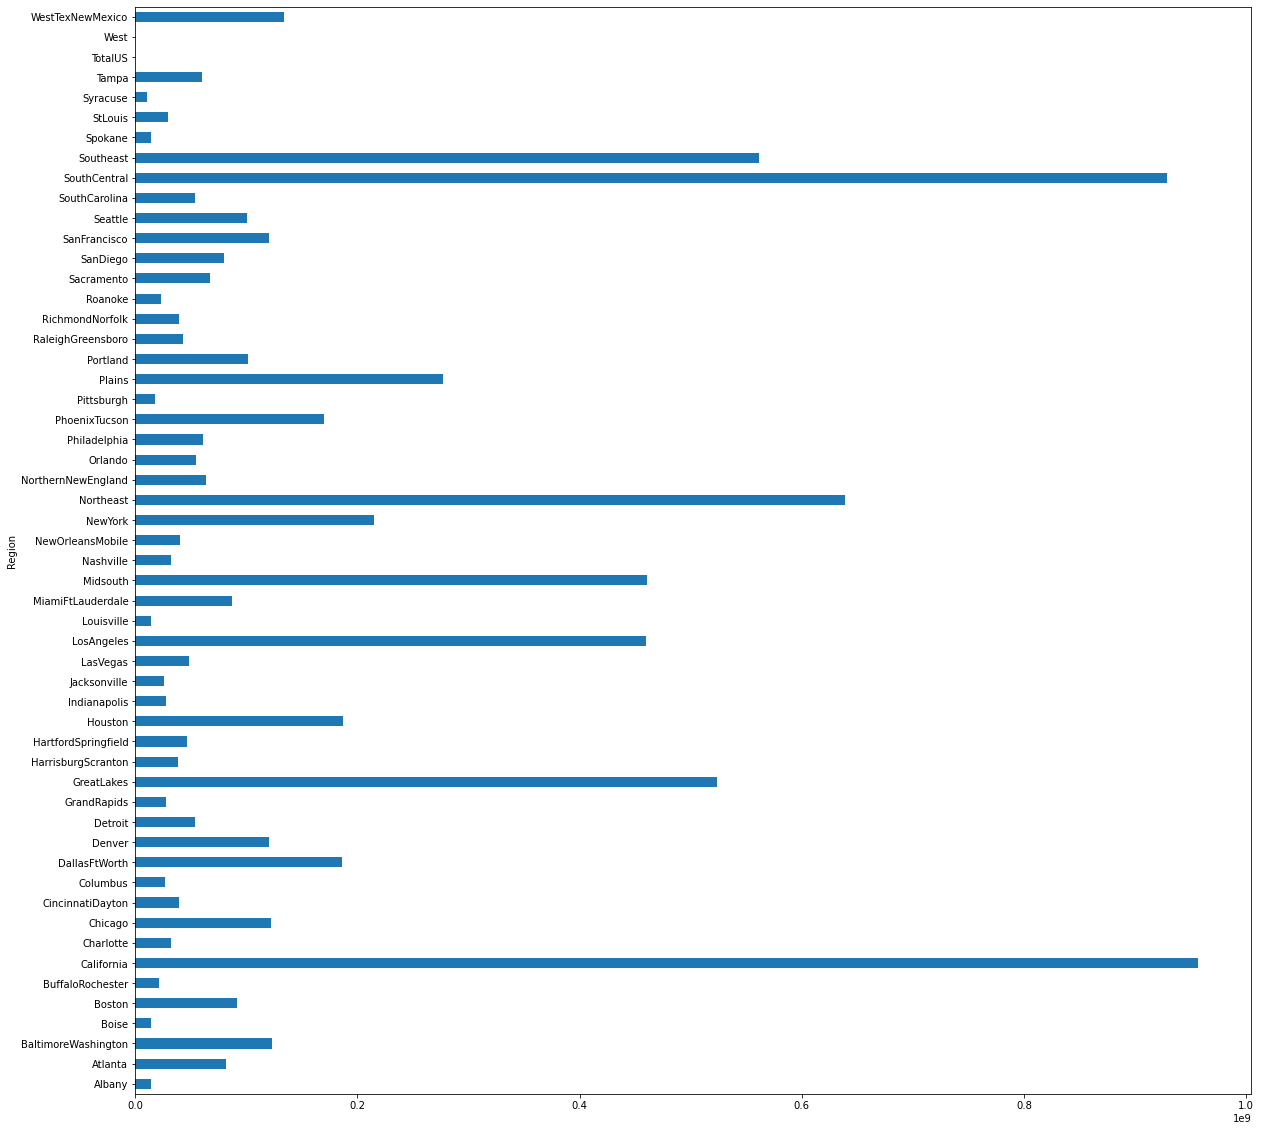

In [27]:
bh = av6.plot.barh( y = 'Region', figsize=(20, 20))
bh

Text(0, 0.5, 'Frequency')

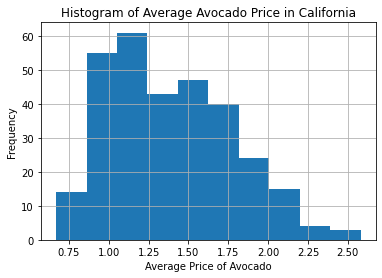

In [30]:
av7 = av5.loc[av5['Region'] == 'California']
av7['AveragePrice'].hist()

plt.title('Histogram of Average Avocado Price in California')
plt.xlabel('Average Price of Avocado')
plt.ylabel('Frequency')

In [29]:
av7.loc[:,['AveragePrice','TotalVolume']].corr()

,AveragePrice,TotalVolume
AveragePrice,1.000000,-0.793044
TotalVolume,-0.793044,1.000000
